In [100]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For data visualisation
import seaborn as sns            # For advanced data visualisation
from sklearn.model_selection import train_test_split     # For splitting data into training and testing sets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression        # For linear regression
from sklearn.preprocessing import StandardScaler         # For standardizing features
from sklearn.metrics import mean_squared_error, r2_score # For evaluating model performances
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [101]:
df=pd.read_csv("train555.csv")
df.head()

Id  carat      cut color clarity  depth  table  price     x     y     z
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50

In [102]:
df.shape

(43152, 11)

In [103]:
df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [105]:
df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [106]:
df.describe()

Id         carat         depth         table         price  \
count  43152.000000  43152.000000  43152.000000  43152.000000  43152.000000   
mean   21576.500000      0.797855     61.747177     57.458347   3929.491912   
std    12457.053745      0.473594      1.435454      2.233904   3985.527795   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    10788.750000      0.400000     61.000000     56.000000    947.750000   
50%    21576.500000      0.700000     61.800000     57.000000   2401.000000   
75%    32364.250000      1.040000     62.500000     59.000000   5312.000000   
max    43152.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  43152.000000  43152.000000  43152.000000  
mean       5.731568      5.735018      3.538568  
std        1.121279      1.148809      0.708238  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [107]:
corr_matrix=df.corr()
corr_matrix["price"].sort_values(ascending=False)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22640\3379337929.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

In [108]:
df.query("x==0 or y==0 or z==0")

Id  carat        cut color clarity  depth  table  price     x     y  \
571      572   1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47   
903      904   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42   
1221    1222   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00   
4980    4981   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04   
6765    6766   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00   
11221  11222   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85   
13727  13728   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95   
14265  14266   1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47   
16971  16972   1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48   
21061  21062   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83   
22171  22172   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00   
24901  24902   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00   
27221  27222   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67   
34065  34066   1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60   
35347  35348   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45   
39201  39202   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62   
42898  42899   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37   

         z  
571    0.0  
903    0.0  
1221   0.0  
4980   0.0  
6765   0.0  
11221  0.0  
13727  0.0  
14265  0.0  
16971  0.0  
21061  0.0  
22171  0.0  
24901  0.0  
27221  0.0  
34065  0.0  
35347  0.0  
39201  0.0  
42898  0.0

<Axes: xlabel='carat', ylabel='price'>

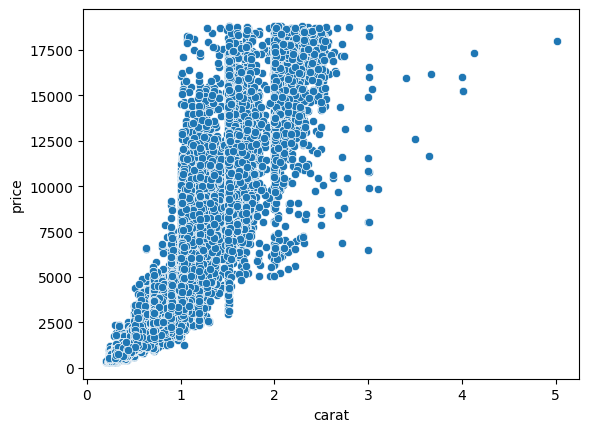

In [109]:
sns.scatterplot(x=df["carat"] , y=df["price"])

In [110]:
len(df.query("carat>3"))

21

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22640\2239777731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


<Axes: xlabel='price', ylabel='Density'>

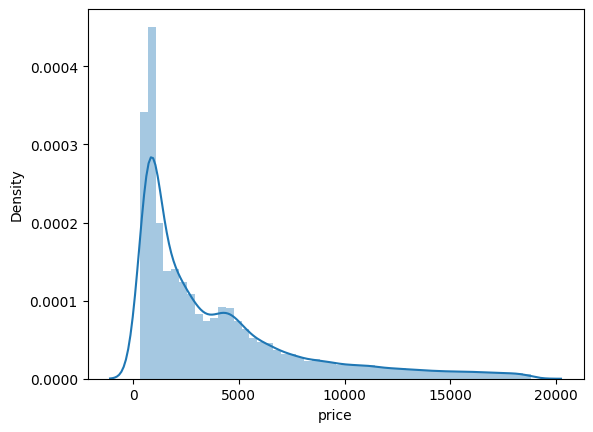

In [111]:
sns.distplot(df.price)

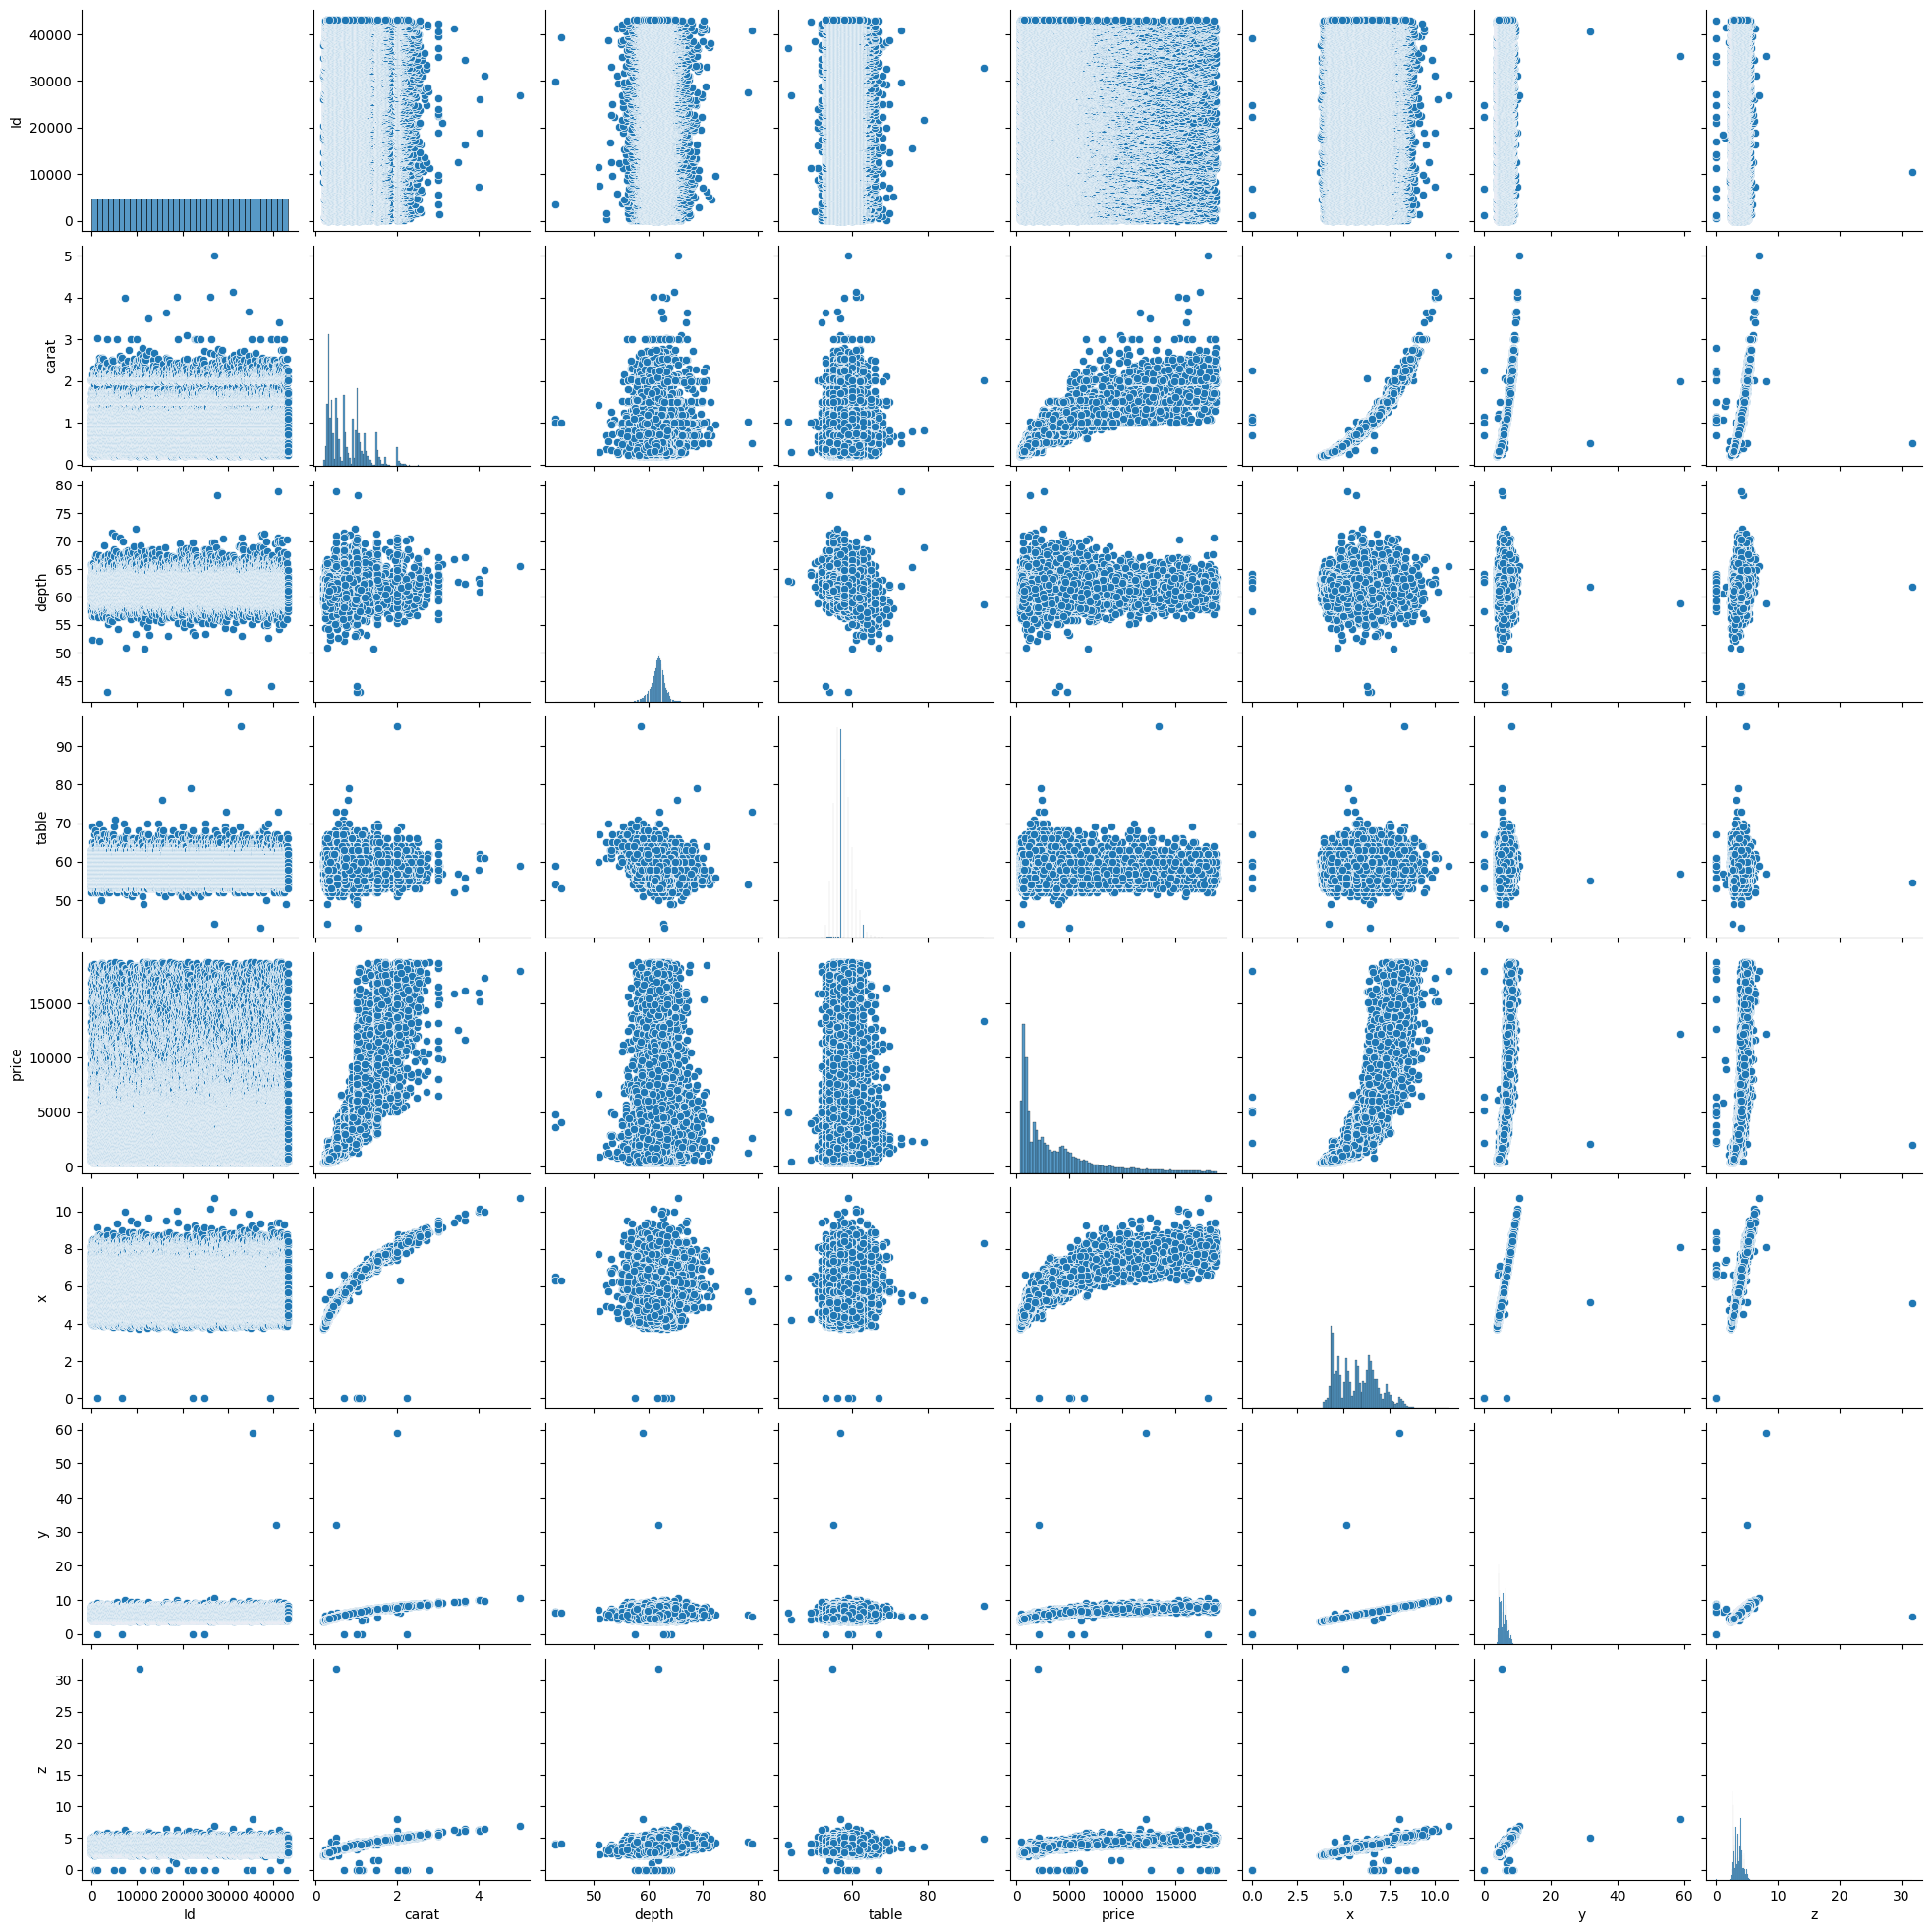

In [112]:
sns.pairplot(df)

In [113]:
df.query("z>10 or y>10")

Id  carat        cut color clarity  depth  table  price      x  \
10541  10542   0.51  Very Good     E     VS1   61.8   54.7   1970   5.12   
26030  26031   4.01    Premium     I      I1   61.0   61.0  15223  10.14   
26886  26887   5.01       Fair     J      I1   65.5   59.0  18018  10.74   
35359  35360   2.00    Premium     H     SI2   58.9   57.0  12210   8.09   
40663  40664   0.51      Ideal     E     VS1   61.8   55.0   2075   5.15   

           y      z  
10541   5.15  31.80  
26030  10.10   6.17  
26886  10.54   6.98  
35359  58.90   8.06  
40663  31.80   5.12

In [114]:
df.query("z>10 or y>10").index

Int64Index([10541, 26030, 26886, 35359, 40663], dtype='int64')

In [115]:
df.drop(df.query("z>10 or y>10").index, inplace=True)
df.query("x==0 or y==0 or z==0")

Id  carat        cut color clarity  depth  table  price     x     y  \
571      572   1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47   
903      904   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42   
1221    1222   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00   
4980    4981   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04   
6765    6766   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00   
11221  11222   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85   
13727  13728   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95   
14265  14266   1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47   
16971  16972   1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48   
21061  21062   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83   
22171  22172   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00   
24901  24902   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00   
27221  27222   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67   
34065  34066   1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60   
35347  35348   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45   
39201  39202   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62   
42898  42899   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37   

         z  
571    0.0  
903    0.0  
1221   0.0  
4980   0.0  
6765   0.0  
11221  0.0  
13727  0.0  
14265  0.0  
16971  0.0  
21061  0.0  
22171  0.0  
24901  0.0  
27221  0.0  
34065  0.0  
35347  0.0  
39201  0.0  
42898  0.0

In [116]:
df.query("x==0 or y==0 or z==0").index

Int64Index([  571,   903,  1221,  4980,  6765, 11221, 13727, 14265, 16971,
            21061, 22171, 24901, 27221, 34065, 35347, 39201, 42898],
           dtype='int64')

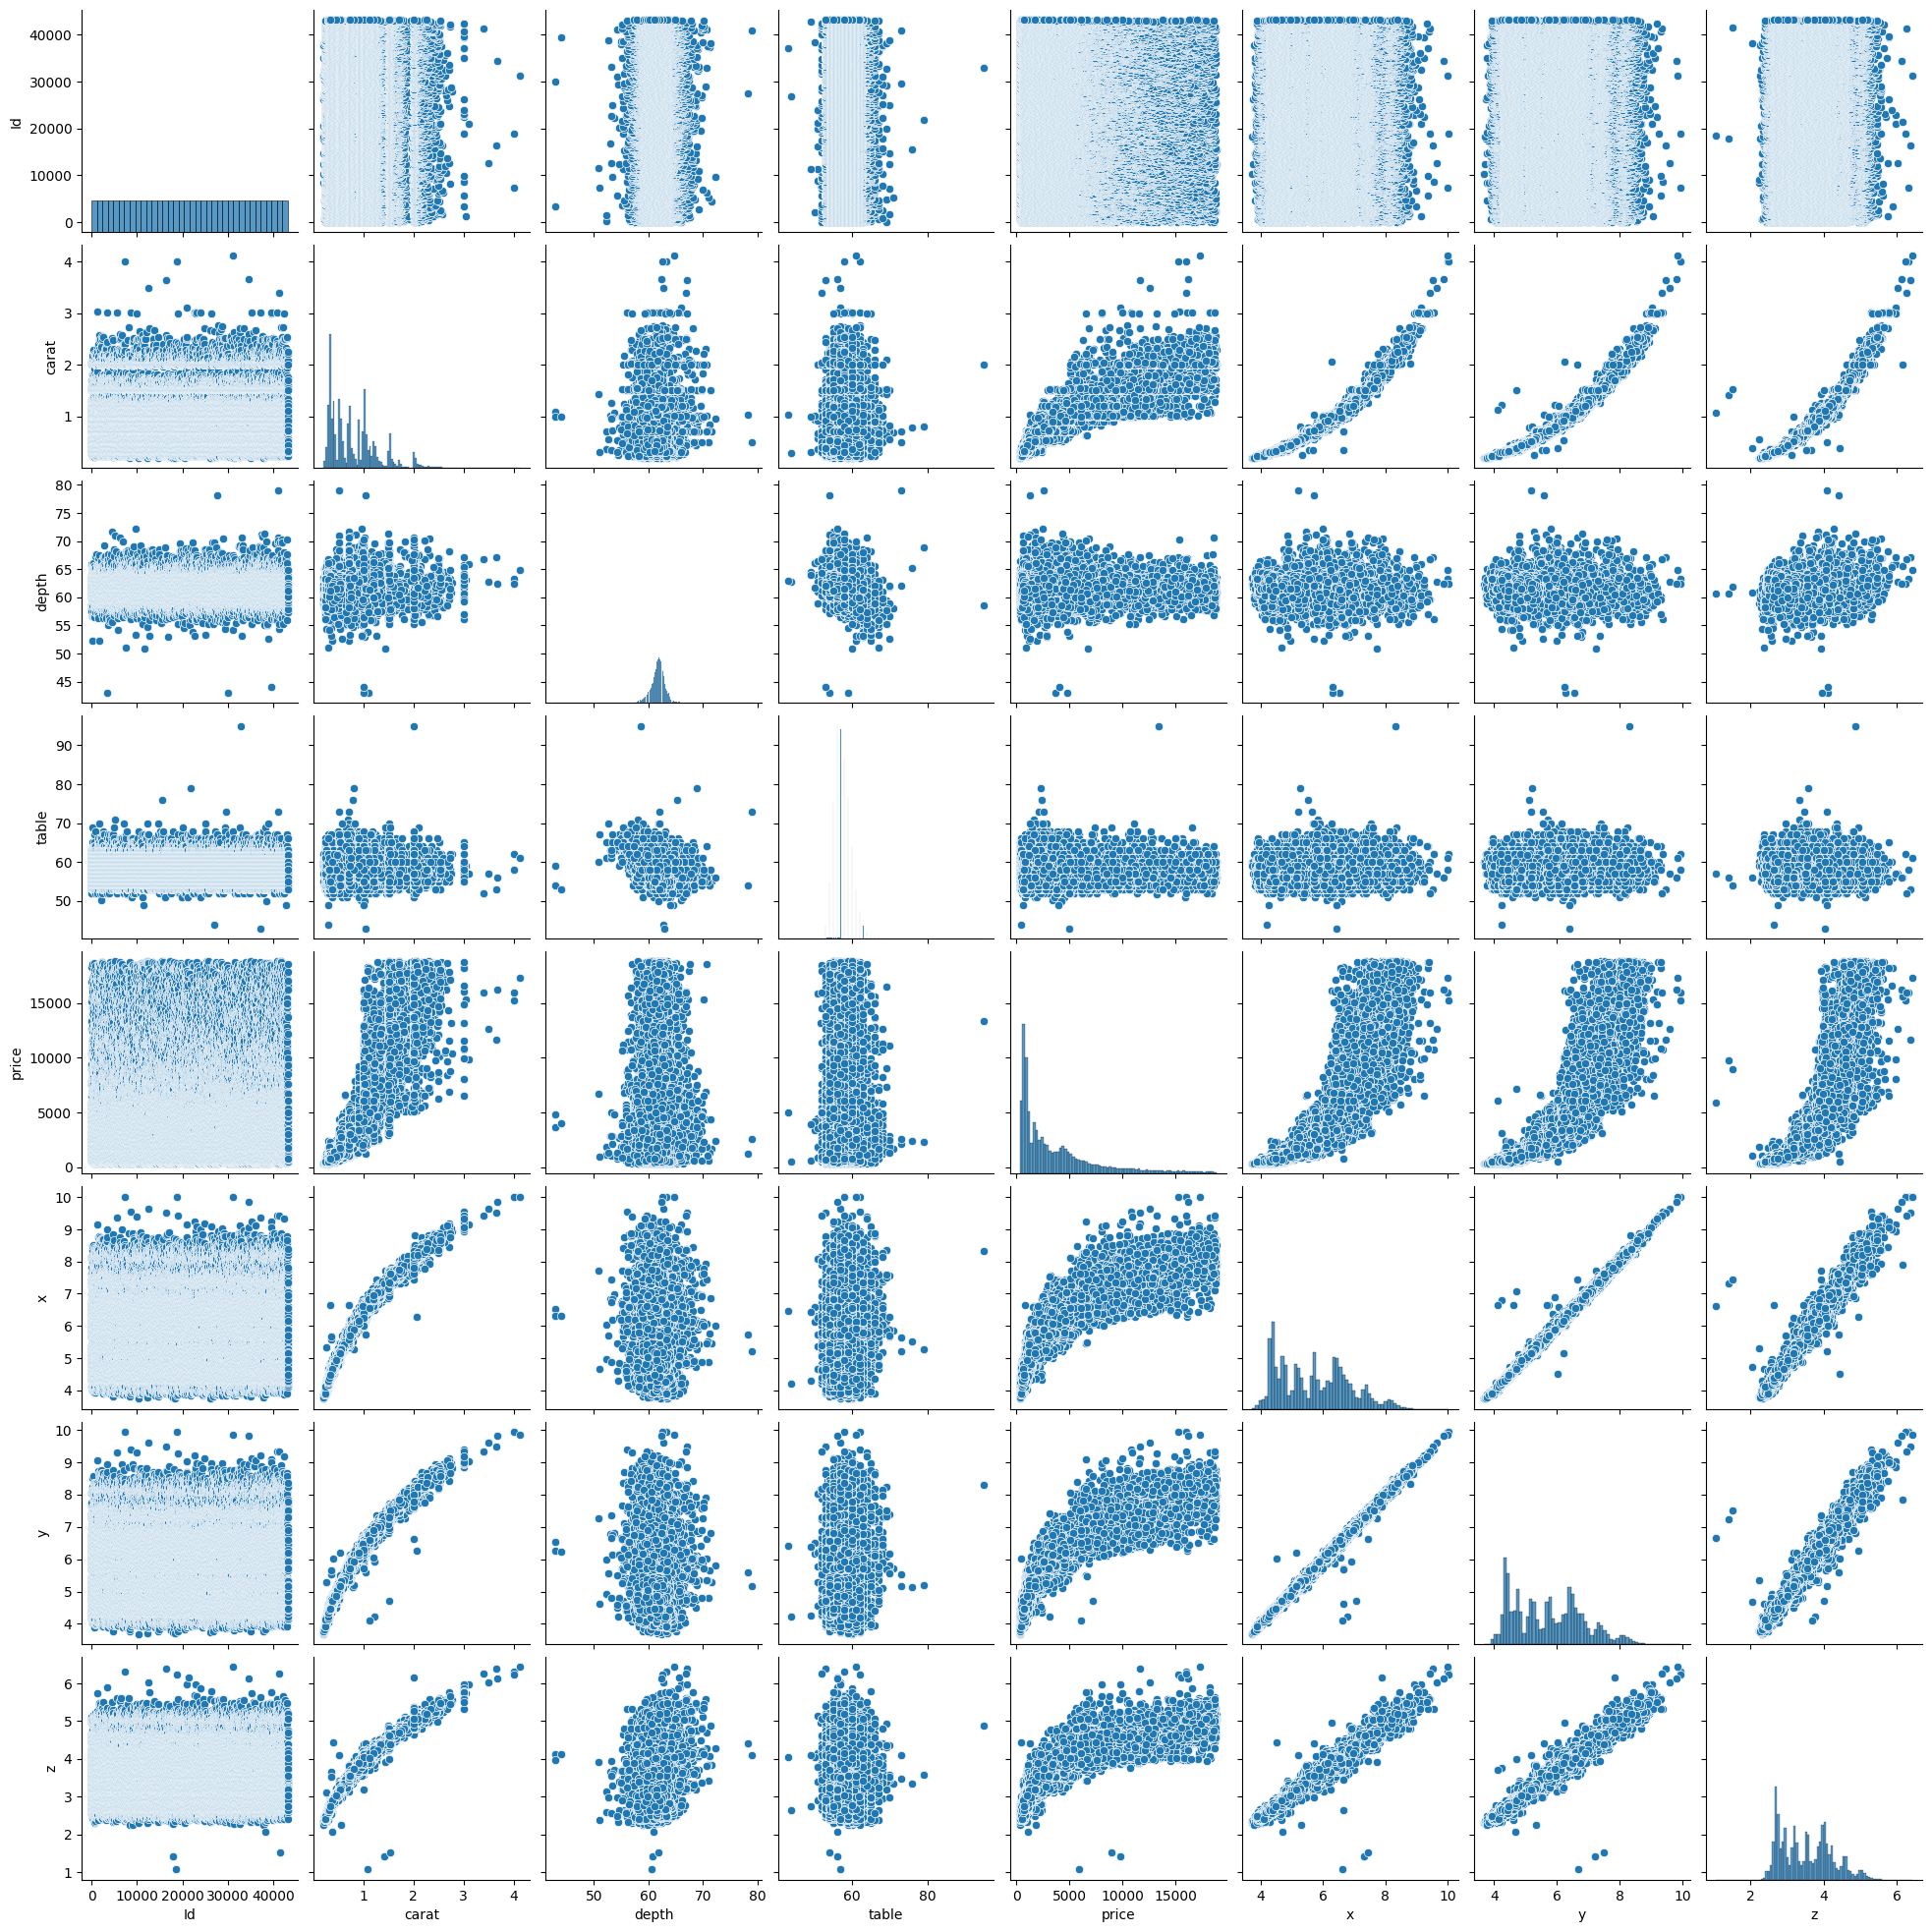

In [117]:
df.drop(df.query("x==0 or y==0 or z==0").index, inplace=True)
sns.pairplot(df)

In [118]:
df.head()

Id  carat      cut color clarity  depth  table  price     x     y     z
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50

In [119]:
df['vol'] = df.x * df.y * df.z
df.head()

Id  carat      cut color clarity  depth  table  price     x     y     z  \
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07   
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51   
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71   
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19   
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50   

          vol  
0  176.483340  
1  246.965796  
2   52.943373  
3   86.422842  
4  115.315200

In [120]:
df.drop(['x','y','z'], axis=1, inplace=True)
df.head()

Id  carat      cut color clarity  depth  table  price         vol
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  176.483340
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  246.965796
2   3   0.32    Ideal     F     VS2   61.3   56.0    828   52.943373
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577   86.422842
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  115.315200

In [121]:
df.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [122]:
df.cut.replace({'Ideal':5, 'Premium':4, 'Good':2, 'Very Good':3, 'Fair':1}, inplace=True)
df.head()

Id  carat  cut color clarity  depth  table  price         vol
0   1   1.06    5     I     SI2   61.8   57.0   4270  176.483340
1   2   1.51    4     G    VVS2   60.9   58.0  15164  246.965796
2   3   0.32    5     F     VS2   61.3   56.0    828   52.943373
3   4   0.53    5     G     VS2   61.2   56.0   1577   86.422842
4   5   0.70    4     H    VVS2   61.0   57.0   2596  115.315200

In [123]:
df.color.unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

In [124]:
df.color.replace({'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1}, inplace=True)
df.head()

Id  carat  cut  color clarity  depth  table  price         vol
0   1   1.06    5      6     SI2   61.8   57.0   4270  176.483340
1   2   1.51    4      4    VVS2   60.9   58.0  15164  246.965796
2   3   0.32    5      3     VS2   61.3   56.0    828   52.943373
3   4   0.53    5      4     VS2   61.2   56.0   1577   86.422842
4   5   0.70    4      5    VVS2   61.0   57.0   2596  115.315200

In [125]:
df.clarity.unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

In [126]:
df.clarity.replace({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8}, inplace=True)
df.head()

Id  carat  cut  color  clarity  depth  table  price         vol
0   1   1.06    5      6        1   61.8   57.0   4270  176.483340
1   2   1.51    4      4        5   60.9   58.0  15164  246.965796
2   3   0.32    5      3        4   61.3   56.0    828   52.943373
3   4   0.53    5      4        4   61.2   56.0   1577   86.422842
4   5   0.70    4      5        5   61.0   57.0   2596  115.315200

In [127]:
X = df.drop(['price'], axis=1)
X.head()

Id  carat  cut  color  clarity  depth  table         vol
0   1   1.06    5      6        1   61.8   57.0  176.483340
1   2   1.51    4      4        5   60.9   58.0  246.965796
2   3   0.32    5      3        4   61.3   56.0   52.943373
3   4   0.53    5      4        4   61.2   56.0   86.422842
4   5   0.70    4      5        5   61.0   57.0  115.315200

In [128]:
y = df['price']
y.head()

0     4270
1    15164
2      828
3     1577
4     2596
Name: price, dtype: int64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [130]:
import sklearn.linear_model as sl
linreg = sl.LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [131]:
print('R squared of the Linear Regression on training set: {:.2%}'.format(linreg.score(X_train, y_train)))
print('R squared of the Linear Regression on test set: {:.2%}'.format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 88.42%
R squared of the Linear Regression on test set: 88.56%


<Axes: xlabel='price'>

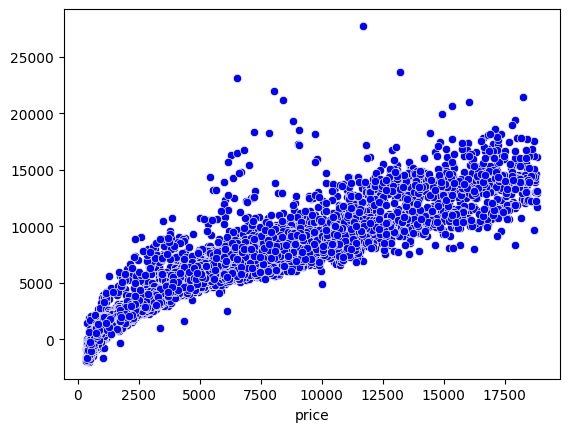

In [132]:
y_pred = linreg.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred, color="blue")

In [133]:
import sklearn.tree as st
tree = st.DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [134]:
print('R squared of the Decision Tree Regressor on training set: {:.2%}'.format(tree.score(X_train, y_train)))
print('R squared of the Decision Tree Regressor on test set: {:.2%}'.format(tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 100.00%
R squared of the Decision Tree Regressor on test set: 96.35%


<Axes: xlabel='price'>

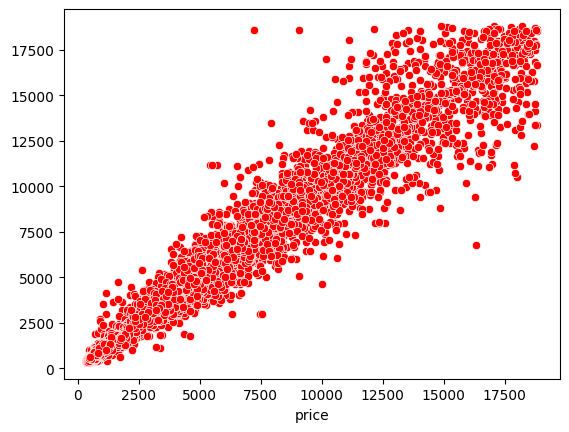

In [135]:
y_pred1 = tree.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred1, color="red")

In [136]:
import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [137]:
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf.score(X_train, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.70%
R squared of the Random Forest Regressor on test set: 97.97%


<Axes: xlabel='price'>

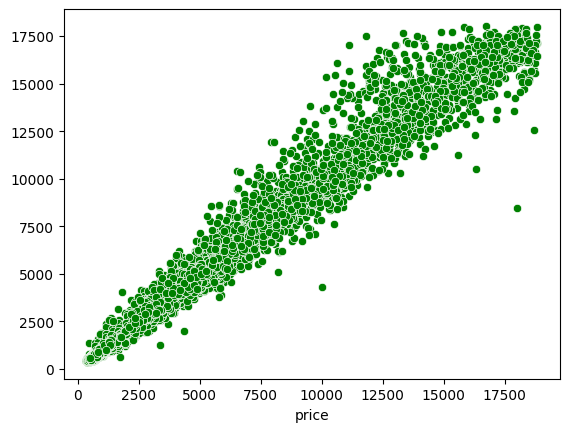

In [138]:
y_pred2 = rf.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred2, color="green")

In [139]:
d = {'true': y_test, 'predicted': y_pred}
df_lr = pd.DataFrame(data=d)
df_lr['diff'] = df_lr['predicted']-df_lr['true']
df_lr

true     predicted         diff
42704    828   -257.893885 -1085.893885
30980   4939   4739.994510  -199.005490
1832    4560   5711.235266  1151.235266
34100   2326   2307.510519   -18.489481
32048   5154   5875.661254   721.661254
...      ...           ...          ...
36942   2175   2978.608703   803.608703
1264    2340   3818.566142  1478.566142
14225  12338  10680.458056 -1657.541944
5864    2748   2857.426457   109.426457
20493   5633   6171.140093   538.140093

[14233 rows x 3 columns]

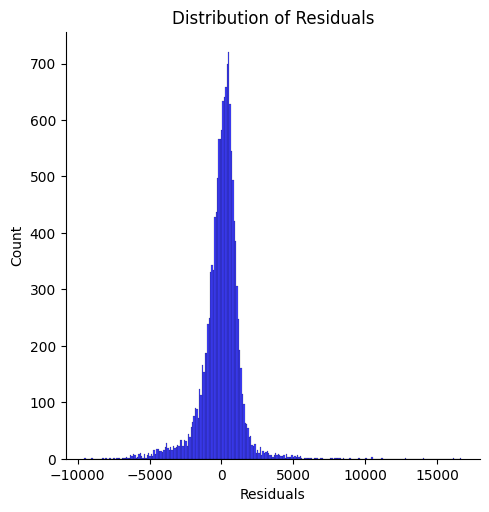

In [140]:
# Calculate the residuals
residuals = y_pred - y_test

# Create the distribution plot
sns.displot(data=residuals, color='blue')

# Add labels and customize the plot
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.show()

In [141]:
print('Mean Absolute Error of the Linear Regression on test set is {:.2f}'.format(mt.mean_absolute_error(y_test,y_pred1)))

Mean Absolute Error of the Linear Regression on test set is 383.84


In [142]:
print('Mean Squared Log Error of the Linear Regression on test set is {:.2%}'.format(mt.mean_squared_log_error(y_test,y_pred)))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

(array([  7.,  12.,  25.,  49.,  74., 141., 160., 219., 290., 397.]),
 array([-1.98387110e+03, -1.78556895e+03, -1.58726680e+03, -1.38896465e+03,
        -1.19066250e+03, -9.92360352e+02, -7.94058203e+02, -5.95756053e+02,
        -3.97453904e+02, -1.99151754e+02, -8.49604797e-01]),
 <BarContainer object of 10 artists>)

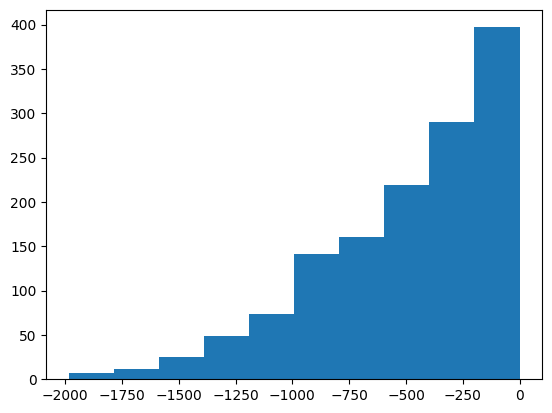

In [143]:
import matplotlib.pyplot as plt
plt.hist(y_pred[y_pred < 0 ])

In [144]:
d = {'true': y_test, 'predicted': y_pred1}
df_dt = pd.DataFrame(data=d)
df_dt['diff'] = df_dt['predicted']-df_dt['true']
df_dt

true  predicted    diff
42704    828      666.0  -162.0
30980   4939     4201.0  -738.0
1832    4560     4414.0  -146.0
34100   2326     2031.0  -295.0
32048   5154     6970.0  1816.0
...      ...        ...     ...
36942   2175     3229.0  1054.0
1264    2340     2834.0   494.0
14225  12338    10681.0 -1657.0
5864    2748     2803.0    55.0
20493   5633     5819.0   186.0

[14233 rows x 3 columns]

In [145]:
print('Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}'.format(mt.mean_absolute_error(y_test,y_pred1)))

Mean Absolute Error of the Decision Tree Regressor on test set is 383.84


In [146]:
d = {'true': y_test, 'predicted': y_pred2}
df_rf = pd.DataFrame(data=d)
df_rf['diff'] = df_rf['predicted']-df_rf['true']
df_rf

true  predicted     diff
42704    828     756.72   -71.28
30980   4939    4566.61  -372.39
1832    4560    4408.08  -151.92
34100   2326    2153.53  -172.47
32048   5154    5671.14   517.14
...      ...        ...      ...
36942   2175    2898.34   723.34
1264    2340    2672.29   332.29
14225  12338   10440.21 -1897.79
5864    2748    2897.25   149.25
20493   5633    6329.39   696.39

[14233 rows x 3 columns]

In [147]:
print('Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}'.format(mt.mean_absolute_error(y_test,y_pred2)))

Mean Absolute Error of the Random Forest Regressor on test set is 293.68


In [148]:
print('Mean Squared Log Error of the Random Forest Regressor on test set is {:.2%}'.format(mt.mean_squared_log_error(y_test,y_pred2)))

Mean Squared Log Error of the Random Forest Regressor on test set is 1.24%


In [149]:
model = rf
model

RandomForestRegressor(random_state=42)

In [153]:
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'rf': [new_diamond_prediction]})

# Save the DataFrame as a CSV file
predictions_df.to_csv('predictions2.csv', index=False)

In [154]:
new_diamond = [0.23, 5, 2, 1, 61.5, 55, 38.20, 50]
new_diamond

[0.23, 5, 2, 1, 61.5, 55, 38.2, 50]

In [155]:
new_diamond_prediction = model.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(new_diamond_prediction))


 The market price of this new diamond is $7661.16


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
